In [ ]:
import numpy as np
import os 
import tensorflow as tf
import keras 
from  keras.models import Sequential
import numpy  as np 
import matplotlib.pyplot as plt 
import cv2
import random 
import pickle
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
Categories=['with_mask','without_mask']

Mounted at /content/drive


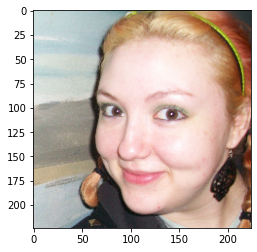

In [ ]:
main_images_path='/content/drive/MyDrive'
image_size=224
for category in Categories:
  image_paths=os.path.join(main_images_path, category)
  for image in os.listdir(image_paths)[:1]:
    image_path=os.path.join(image_paths,image)
    image_array=cv2.imread(image_path)
    image_array=cv2.cvtColor(image_array,cv2.COLOR_BGR2RGB)
    image_array=cv2.resize(image_array,(image_size, image_size))
    plt.imshow(image_array)

In [ ]:
main_path='/content/drive/MyDrive'
image_size=224
categories=['with_mask','without_mask']

def data_prep():
  train_data=[]
  x_train_data=[]
  y_train_data=[]
  for category in categories:
    sub_path=os.path.join(main_path, category)
    indexes=categories.index(category)
    for image in os.listdir(sub_path):
      image_src=os.path.join(sub_path,image)
      #Image reading and converting to the arrays
      image_arrs=cv2.imread(image_src)
      # changing color
      image_arrs=cv2.cvtColor(image_arrs,cv2.COLOR_BGR2RGB)
      #changing the size of images
      image_arrs=cv2.resize(image_arrs,(image_size, image_size))
      train_data.append([image_arrs,indexes])
  for features, label in train_data:
    x_train_data.append(features)
    y_train_data.append(label)

  x_train_data=np.array(x_train_data).reshape(-1,image_size, image_size,3)
  #Data normalization
  x_train_data=x_train_data/255
  y_train_data=np.array(y_train_data)
  pickle_in=open("x_train.pickle", 'wb')
  pickle.dump(x_train_data, pickle_in)
  pickle_in.close()
  pickle_in= open('y_train.pickle','wb')
  pickle.dump(y_train_data, pickle_in)
  pickle_in.close()
  print(' data has been completely sorted ')
data_prep()






 data has been completely sorted 


In [22]:
pickle_out=open('/content/x_train.pickle','rb')
x_train_data=pickle.load(pickle_out)
pickle_out=open('/content/y_train.pickle','rb')
y_train_data=pickle.load(pickle_out)

In [30]:
import keras 
from keras.layers  import Dense,Activation, Flatten
from keras import layers
model= keras.applications.mobilenet.MobileNet()
base_input=model.layers[0].input
last_four=model.layers[-4].output
flatten= layers.Flatten()(last_four)
dense_layer= layers.Dense(1)(flatten)
activation_layer= layers.Activation('sigmoid')(dense_layer)
new_model= keras.Model(inputs=base_input, outputs=activation_layer)
new_model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
new_model.fit(x_train_data, y_train_data,epochs=1, validation_split=0.1)

56/56 [==============================] - 355s 6s/step - loss: 0.1015 - accuracy: 0.9501 - val_loss: 2.1132e-05 - val_accuracy: 1.0000


In [31]:
new_model.save('face_mask_detect.h5')